# Example for reading depth data file

In [1]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
depth_path = './tmp/Depth'

# Depth data parameters
w = 640
h = 480

### Read and decompress the depth data

In [9]:
with open(depth_path, 'rb') as f:
    data = zlib.decompress(f.read(), -15)

In [67]:
FRAME_COUNT = int(len(data) / w / h / 2)
print (FRAME_COUNT)

250


### Convert bytes to numpy array and set NaNs to zero

In [11]:
frames = np.frombuffer(data, np.float16).reshape(FRAME_COUNT,h,w).copy()
frames = np.nan_to_num(frames, 0)

### Preprocess data for visualization

In [31]:
maxim = frames.max()
imgs = (frames * 1000).astype('uint16')

### Show one frame

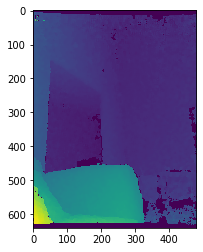

In [32]:
plt.imshow(np.flip(imgs[0,:,:].T, axis=1))

### Write depth video to a  file

In [35]:
# FPS = 25 # TODO: figure out the correct fps
# fourcc = cv2.VideoWriter_fourcc(*'mpv4')
# out = cv2.VideoWriter('./depth_video.mp4',fourcc, FPS, (h,w))
depthPath = "./depth/"
imgpath = "./image/"

for i in range(FRAME_COUNT):
    cv2.imwrite(depthPath + "depth" + str(i+1).zfill(5) + ".png", np.flip(imgs[i,:,:].T, axis=1))
#     out.write(cv2.cvtColor(np.flip(imgs[i,:,:].T, axis=1), cv2.COLOR_GRAY2BGR))

# out.release()

### Extract Frames from Video File

In [66]:
vidcap = cv2.VideoCapture('output.mov')
fps = vidcap.get(cv2.CAP_PROP_FPS)
print(fps)
# vidcap.set(cv2.CAP_PROP_FPS , 25)
# success,image = vidcap.read()
# i = 1
# while success:
#     cv2.imwrite("./image/"+str(i).zfill(5) + ".png", np.rot90(image, axes = (1,0)))     # save frame as PNG file      
#     success,image = vidcap.read()
#     i += 1

20.618701007838744
